# Групповая обработка и слияние данных в Pandas

Библиотека `pandas` - это основной инструмент для работы с табличными данными в Python.

С помощью библиотеки `pandas` можно:  
 - загружать данные из разных форматов и источников,
 - отфильтровывать и выбирать нужные данные,
 - выполнять вычисления на основе данных,
 - агрегировать данные,
 - переструктурировать данные,
 - объединять данные из разных источников,
 - выполнять очистку данных и замену пропущенных значений,
 - быстро визуализировать данные,
 - экспортировать данные в различные форматы.

В этом блокноте рассмотрены инструменты для групповой обработки данных, построения сводных таблиц, слияния данных из разных источников, а также работа с мультииндексами.

## Ресурсы

* Книги Уэса Маккинни Python и анализ данных и Дж. Вандер Пласа Python для сложных задач (см. ресурсы в LMS)
* Раздел про [групповую обработку в документации Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* Раздел про [слияние данных в документации Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
* Видео Jason Wirth - [A Visual Guide to Pandas](https://www.youtube.com/watch?v=9d5-Ti6onew)
* Документация: https://pandas.pydata.org/
* 10 minutes intro: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* Pandas Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* Pandas Basics Cheat-Sheet: http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3

## Подготовка

Подключим библиотеку и загрузим набор данных из текстового файла. [CSV = Comma Separated Values](https://ru.wikipedia.org/wiki/CSV) - распространенный формат обмена табличными данными, в котором каждой строке файла соответствует строка таблицы данных, а значения их разных столбцов разделяются запятыми или другими разделителями. Обычно также присутствует строка заголовка таблицы с названиями ее столбцов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mpg = pd.read_csv('../datasets/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Мы загрузили данные о расходе топлива автомобилями разных марок и годов производства. Столбцы таблицы обозначают:

 - `manufacturer` - марка машины
 - `model` - модель
 - `displ` - объем двигателя в л
 - `year` - год выпуска
 - `cyl` - количество цилиндров
 - `trans` - тип трансмиссии (ручная или автоматическая коробка передач)
 - `drv` - тип привода (`f` - передний, `r` - задний, `4` - полный)
 - `cty` - пробег на 1 галлоне топлива (~4 л) в городе
 - `cty` - пробег на 1 галлоне топлива на трассе
 - `fl` - тип топлива
 - `class` - класс машины
 
Загруженный набор данных доступен в виде объекта `mpg`. Тип объекта - `DataFrame` (датафрейм, или просто таблица данных).

Структура таблицы Pandas показана на рисунке:

![](pics/pandas-data-structure.svg)

## Групповая обработка - `groupby()`

### Принцип Разбиение - Применение - Объединение

Просты агрегирующие функции дают возможность познакомиться с набором данных, но часто нужно выполнить условное агрегирование по какому-нибудь категориальному столбцу данных или по индексу. Это действие в pandas реализовано в операции `GroupBy`. Эта операция разбивает набор данных на группы по уникальным значениям выбранных полей или индекса. Затем к каждой группе применяется некоторая функция агрегирования или преобразования. Также можно использовать циклы по группам. Затем результаты обработки групп объединяются снова в один набор данных. Удобство групповой обработки состоит в том, что все эти действия производятся автоматически.

![](pics/group_by.png)

На рисунке показано, как групповая обработка используется для определения сумм по категориям, заданным ключевым столбцом.

Используем групповую обработку для того, чтобы посчитать среднюю топливную эффективность различных марок машин.

In [2]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
mpg_groupby = mpg.loc[:, :'cty'].groupby('manufacturer') # Группируем таблицу по производителю

In [4]:
mpg_groupby # Получили объект GroupBy

Внутри объекта `GroupBy` содержатся сгруппированные строки таблицы в виде списка кортежей вида:  
`(ключ, фрагмент данных, соответствующий этому ключу)`

In [5]:
list(mpg_groupby)[:2] 

[('audi',
     manufacturer       model  displ  year  cyl       trans drv  cty
  0          audi          a4    1.8  1999    4    auto(l5)   f   18
  1          audi          a4    1.8  1999    4  manual(m5)   f   21
  2          audi          a4    2.0  2008    4  manual(m6)   f   20
  3          audi          a4    2.0  2008    4    auto(av)   f   21
  4          audi          a4    2.8  1999    6    auto(l5)   f   16
  5          audi          a4    2.8  1999    6  manual(m5)   f   18
  6          audi          a4    3.1  2008    6    auto(av)   f   18
  7          audi  a4 quattro    1.8  1999    4  manual(m5)   4   18
  8          audi  a4 quattro    1.8  1999    4    auto(l5)   4   16
  9          audi  a4 quattro    2.0  2008    4  manual(m6)   4   20
  10         audi  a4 quattro    2.0  2008    4    auto(s6)   4   19
  11         audi  a4 quattro    2.8  1999    6    auto(l5)   4   15
  12         audi  a4 quattro    2.8  1999    6  manual(m5)   4   17
  13         audi  a4 qu

Отдельную группу можно получить так:

In [6]:
mpg_groupby.get_group('audi')

,manufacturer,model,displ,year,cyl,trans,drv,cty
0,audi,a4,1.8,1999,4,auto(l5),f,18
1,audi,a4,1.8,1999,4,manual(m5),f,21
2,audi,a4,2.0,2008,4,manual(m6),f,20
3,audi,a4,2.0,2008,4,auto(av),f,21
4,audi,a4,2.8,1999,6,auto(l5),f,16
5,audi,a4,2.8,1999,6,manual(m5),f,18
6,audi,a4,3.1,2008,6,auto(av),f,18
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20


По полученному объекту `GroupBy` можно итерироваться с помощью циклов. Это может быть полезно, если нужно сохранить данные в отдельный файл или построить графики по каждой подгруппе отдельно.

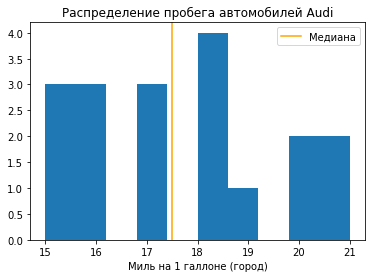

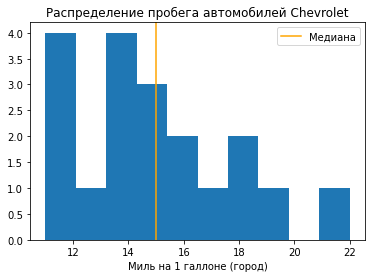

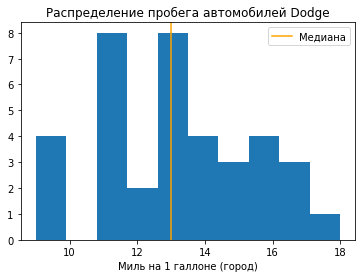

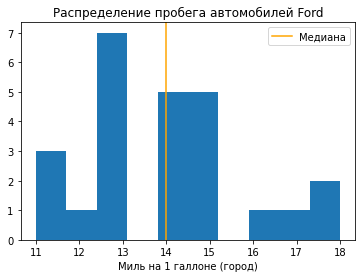

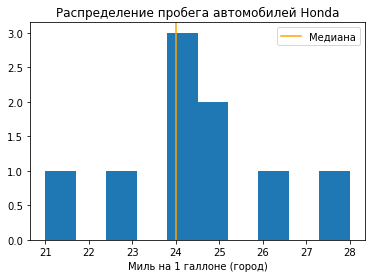

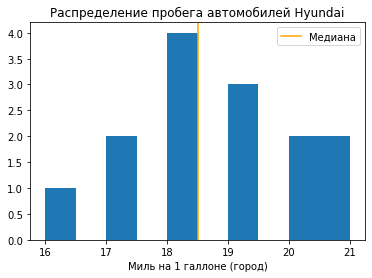

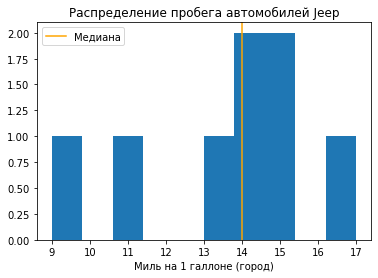

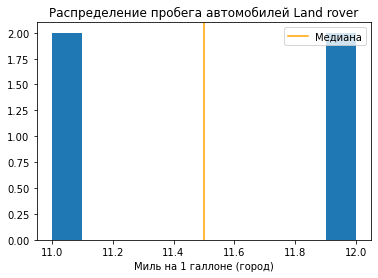

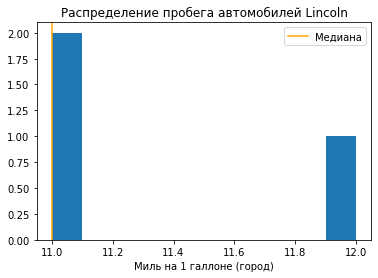

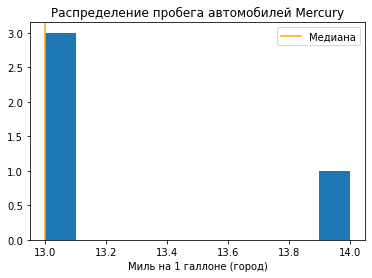

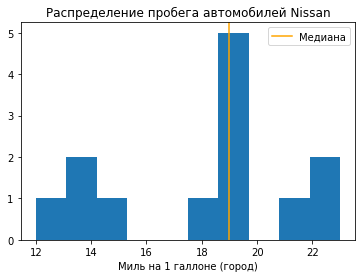

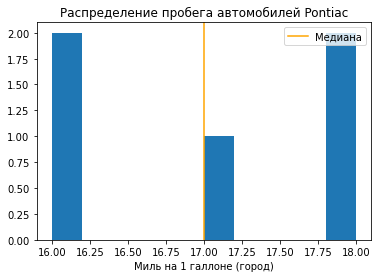

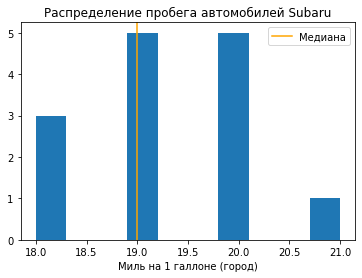

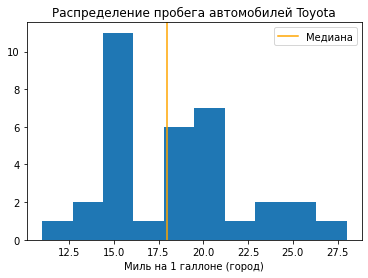

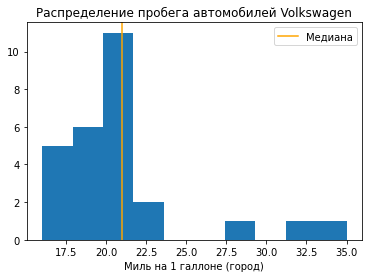

In [7]:
for name, data in mpg_groupby:
    plt.hist(data['cty'])
    plt.title('Распределение пробега автомобилей ' + name.capitalize())
    plt.xlabel('Миль на 1 галлоне (город)')
    plt.axvline(data['cty'].median(), label='Медиана', color='orange')
    plt.legend()
    plt.show()

Помимо использования циклов, можно использовать метод `apply()`, чтобы применить к результатам группировки любую функцию.

Например, так можно посчитать, сколько строк попало в каждую группу:

In [8]:
mpg_groupby.apply(len)

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
dtype: int64

Поскольку определение размера группы - востребованная операций, у объекта `GroupBy` есть метод `size()`, который выдает сколько строк оказалось в каждой группе.

In [9]:
mpg_groupby.size()

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
dtype: int64

Однако наиболее частое использование сгруппированных данных - это подсчет итогов по ним.

In [10]:
avg_by_manufacturer = mpg_groupby.mean() # Посчитали среднее по всем числовым столбцам
avg_by_manufacturer

,displ,year,cyl,cty
manufacturer,,,,
audi,2.544444,2003.500000,5.222222,17.611111
chevrolet,5.063158,2004.684211,7.263158,15.000000
dodge,4.378378,2004.108108,7.081081,13.135135
ford,4.536000,2002.600000,7.200000,14.000000
honda,1.711111,2003.000000,4.000000,24.444444
hyundai,2.428571,2004.142857,4.857143,18.642857
jeep,4.575000,2005.750000,7.250000,13.500000
land rover,4.300000,2003.500000,8.000000,11.500000
lincoln,5.400000,2002.000000,8.000000,11.333333


In [11]:
avg_cty_by_manufacturer = mpg_groupby['cty'].mean() # Посчитали среднее по столбцу cty
avg_cty_by_manufacturer

manufacturer
audi          17.611111
chevrolet     15.000000
dodge         13.135135
ford          14.000000
honda         24.444444
hyundai       18.642857
jeep          13.500000
land rover    11.500000
lincoln       11.333333
mercury       13.250000
nissan        18.076923
pontiac       17.000000
subaru        19.285714
toyota        18.529412
volkswagen    20.925926
Name: cty, dtype: float64

Обратите внимание, что мы получили ряд. Если нужна таблица, то можно сделать так:

In [12]:
mpg_groupby[['cty']].mean() # Или так, если нужна таблица

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


### Что делать с ключом: индекс vs столбец

По умолчанию pandas при слиянии результатов по подгруппам делает ключ подгруппы индексом таблицы/ряда с итогами. Если удобнее оставить ключ группы столбцом таблицы, то можно при группировке задать аргумент `as_index=False`.

Кстати, групповую обработку обычно делают в один шаг, без создания промежуточной переменной.

In [13]:
mpg.groupby('manufacturer', as_index=False).mean()

,manufacturer,displ,year,cyl,cty,hwy
0,audi,2.544444,2003.500000,5.222222,17.611111,26.444444
1,chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
2,dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
3,ford,4.536000,2002.600000,7.200000,14.000000,19.360000
4,honda,1.711111,2003.000000,4.000000,24.444444,32.555556
5,hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
6,jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
7,land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
8,lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000
9,mercury,4.400000,2003.500000,7.000000,13.250000,18.000000


Еще один способ оставить ключ группировки из индекса в столбцы - сбросить индекс с помощью метода `reset_index()`:

In [14]:
mpg.groupby('manufacturer').mean().reset_index()

,manufacturer,displ,year,cyl,cty,hwy
0,audi,2.544444,2003.500000,5.222222,17.611111,26.444444
1,chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
2,dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
3,ford,4.536000,2002.600000,7.200000,14.000000,19.360000
4,honda,1.711111,2003.000000,4.000000,24.444444,32.555556
5,hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
6,jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
7,land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
8,lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000
9,mercury,4.400000,2003.500000,7.000000,13.250000,18.000000


Метод `reset_index()` переносит значения индекса в столбец таблицы и зменяет индекс числовым.

### Использование в качестве ключа группировки ряда и вычисляемого столбца

Интересно, что группировать можно не только по значениям или индексам таблицы. В качестве ключа в `groupby()` можно передать любой ряд такой же длины, как и таблица данных. Этим можно пользоваться при группировке больших таблиц: можно сначала извлечь только нужные столбцы, а затем сгруппировать используя какой-либо внешний категориальный столбец.

In [15]:
mpg[['cty']].groupby(mpg['manufacturer']).mean() # В таблице остался один столбец `cty`, а группируется она по другому ряду

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


Это удобно использовать также в тех случаях, когда ключ группировки должен быть вначале вычислен. Попробуем посчитать среднюю эффективность машин с разным типом коробки передач:

In [16]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [17]:
mpg[['cty']].groupby(mpg['trans'].str[-3:-1]).mean()

,cty
trans,
av,20.000000
l3,21.000000
l4,15.939759
l5,14.717949
l6,13.666667
m5,19.258621
m6,16.894737
s4,18.666667
s5,17.333333


### Группировка по нескольким ключам

Можно группировать по нескольким ключам одновременно.

In [18]:
mpg.groupby(['year', 'class'])[['cty']].mean()

cty
year class                
1999 2seater     15.500000
     compact     19.760000
     midsize     18.150000
     minivan     16.166667
     pickup      13.000000
     subcompact  21.578947
     suv         13.379310
2008 2seater     15.333333
     compact     20.545455
     midsize     19.333333
     minivan     15.400000
     pickup      13.000000
     subcompact  18.937500
     suv         13.606061

Т.к. мы группировали по двум столбцам, получился иерархический индекс (`MultiIndex`) - подробнее об этом позже. Вернуть ключ группировки в столбцы можно теми же способами, что и раньше. Например, так:

In [19]:
mpg.groupby(['year', 'class'])[['cty']].mean().reset_index()

,year,class,cty
0,1999,2seater,15.500000
1,1999,compact,19.760000
2,1999,midsize,18.150000
3,1999,minivan,16.166667
4,1999,pickup,13.000000
5,1999,subcompact,21.578947
6,1999,suv,13.379310
7,2008,2seater,15.333333
8,2008,compact,20.545455
9,2008,midsize,19.333333


В Pandas можно группировать не только строки, но и столбцы. Например, так можно посчитать, сколько в таблице есть столбцов разных типов:

In [20]:
mpg_grouped_columns = mpg.groupby(mpg.dtypes, axis='columns')
mpg_grouped_columns.apply(lambda x: x.shape[1])

int64      4
float64    1
object     6
dtype: int64

### Фильтрация на основе групп - `filter()`

При необходимости можно отфильтровать строки на основе групп, к которым они принадлежат. Для этого используется метод `filter()`, который применяет заданную функцию к каждой группе. Затем исходная таблица фильтруется и в ней остаются только те строки, которые принадлежат к группам, для которых функция выдала `True`.

В качестве примера, посчитаем средние характеристики машин только по тем производителям, у которых более 15 машин в наборе данных:

In [21]:
mpg.groupby('manufacturer').filter(lambda x: len(x) > 15).groupby('manufacturer').mean()
# filter выдает разгруппированные строки, поэтому пришлось их еще раз сгруппировать

,displ,year,cyl,cty,hwy
manufacturer,,,,,
audi,2.544444,2003.500000,5.222222,17.611111,26.444444
chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
ford,4.536000,2002.600000,7.200000,14.000000,19.360000
toyota,2.952941,2002.705882,5.117647,18.529412,24.911765
volkswagen,2.255556,2002.666667,4.592593,20.925926,29.222222


### Агрегирование

К группам можно применять любые агрегирующие функции, т.е. функции, которые принимают массив значений и возвращают его сводную характеристику (обычно одну).

В таблице приведены некоторые из этих функций, для которых в Pandas есть оптимизированная реализация. Однако агрегирующая функция может быть любой - например, одной из функций для подсчета описательных статистик, или функцией из `numpy`, или пользовательской функцией.

![](pics/pandas-aggregation.png)

Посчитаем медианный пробег на галлоне в городе для разных классов машин:

In [22]:
mpg.groupby('class')[['cty']].median()

,cty
class,
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19
suv,13


Еще один частый пример - поиск лучших/худших представителей в каждой группе. Найдем наиболее экономичные машины в каждом классе:

In [23]:
mpg.groupby('class').apply(lambda x: x.nlargest(1, 'cty'))

,,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
class,,,,,,,,,,,,
2seater,23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
compact,212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
midsize,143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
minivan,37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
pickup,202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
subcompact,221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
suv,161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


### Несколько агрегирующих функций

При необходимости можно получить сразу несколько агрегированных значений. Например, описательную статистику можно получить с помощью `describe()`:

In [24]:
mpg.groupby('class')['cty'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
2seater,5.0,15.400000,0.547723,15.0,15.0,15.0,16.00,16.0
compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.00,33.0
midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.00,23.0
minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.00,18.0
pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.00,17.0
subcompact,35.0,20.371429,4.602338,14.0,17.0,19.0,23.50,35.0
suv,62.0,13.500000,2.420879,9.0,12.0,13.0,14.75,20.0


Мы можем рассчитать для групп произвольный набор характеристик с помощью метода `agg()`. Метод принимает на вход список функций, которые надо применить к группам. Функцию можно указать по имени, а встроенные в Pandas функции можно указывать по их кратким именам в виде строк. 

In [25]:
def my_range(x): # Размах
    return x.max() - x.min()    
    
mpg.groupby('class')['cty'].agg(['mean', 'median', np.median, my_range])

,mean,median,median,my_range
class,,,,
2seater,15.400000,15,15,1
compact,20.127660,20,20,18
midsize,18.756098,18,18,8
minivan,15.818182,16,16,7
pickup,13.000000,13,13,8
subcompact,20.371429,19,19,21
suv,13.500000,13,13,11


Столбцы получают такие же имена, как и у функций для их расчета. Можно также задать сразу понятные имена столбцов, передав на вход `agg()` список из двухэлементных кортежей - с подписями столбцов и с функциями, которые надо применить для их расчета:

In [26]:
mpg.groupby('class')['cty'].agg([('Среднее', 'mean'), 
                                 ('Медиана', 'median'), 
                                 ('Размах', my_range)])

,Среднее,Медиана,Размах
class,,,
2seater,15.400000,15,1
compact,20.127660,20,18
midsize,18.756098,18,8
minivan,15.818182,16,7
pickup,13.000000,13,8
subcompact,20.371429,19,21
suv,13.500000,13,11


В предыдущих примерах мы агрегировали ряд. При агрегировании таблицы функции применяются сразу ко всем столбцам:

In [27]:
mpg.groupby('class')[['cty','hwy']].agg(['mean', 'median', np.median, my_range])

cty                               hwy                       
                 mean median median my_range       mean median median my_range
class                                                                         
2seater     15.400000     15     15        1  24.800000   25.0   25.0        3
compact     20.127660     20     20       18  28.297872   27.0   27.0       21
midsize     18.756098     18     18        8  27.292683   27.0   27.0        9
minivan     15.818182     16     16        7  22.363636   23.0   23.0        7
pickup      13.000000     13     13        8  16.878788   17.0   17.0       10
subcompact  20.371429     19     19       21  28.142857   26.0   26.0       24
suv         13.500000     13     13       11  18.129032   17.5   17.5       15

Если необходимо к разным столбцам применить разные функции, то на вход `agg()` надо подать словарь, в котором для каждого поля (ключ словаря) задается функция или список функций, которые надо применить:

In [28]:
mpg.groupby('class')[['cty','hwy']].agg({ 'cty' : ['mean', 'std'], 
                                         'hwy': ['median', ('range', my_range)]})

cty              hwy      
                 mean       std median range
class                                       
2seater     15.400000  0.547723   25.0     3
compact     20.127660  3.385500   27.0    21
midsize     18.756098  1.946542   27.0     9
minivan     15.818182  1.834022   23.0     7
pickup      13.000000  2.046338   17.0    10
subcompact  20.371429  4.602338   26.0    24
suv         13.500000  2.420879   17.5    15

### Преобразование - `transform()`

Агрегирующие функции сокращают данные по группе, заменяя все сгруппированные строки одним значением. Иногда необходимо вместо этого выполнить некоторое вычисление отдельно по каждой группе. Мы уже видели вариант с `apply()`, но есть еще удобный метод `transform()`. Этот метод возвращает столько же строк, сколько было в исходной таблице, при этом вычисления выполняются для каждой подгруппы отдельно. Можно применять этот метод как к рядам, так и к таблицам данных. 

![](pics/transform-example.png)

Например, таким образом можно центировать данные - посчитать, насколько значение отличается от среднего по группе. 
В следующем примере мы вычислим, насколько эффективность каждой модели машины отличается от средней эффективности машин этого производителя.

In [29]:
mpg2 = mpg.loc[:, ['manufacturer', 'model', 'cty']] # Сделали маленькую табличку с нужными полями

mpg2['group_mean'] = mpg.groupby('manufacturer')['cty'].transform('mean')
mpg2['delta'] = mpg.groupby('manufacturer')['cty'].transform(lambda x: x - x.mean())
mpg2

,manufacturer,model,cty,group_mean,delta
0,audi,a4,18,17.611111,0.388889
1,audi,a4,21,17.611111,3.388889
2,audi,a4,20,17.611111,2.388889
3,audi,a4,21,17.611111,3.388889
4,audi,a4,16,17.611111,-1.611111
...,...,...,...,...,...
229,volkswagen,passat,19,20.925926,-1.925926
230,volkswagen,passat,21,20.925926,0.074074
231,volkswagen,passat,16,20.925926,-4.925926
232,volkswagen,passat,18,20.925926,-2.925926


Здесь пришлось сохранить результат преобразования как столбец таблицы. Сама по себе функция преобразования выдает ряд или таблицу только с преобразованными столбцами

In [30]:
mpg.groupby('manufacturer')['cty'].transform('mean')

0      17.611111
1      17.611111
2      17.611111
3      17.611111
4      17.611111
         ...    
229    20.925926
230    20.925926
231    20.925926
232    20.925926
233    20.925926
Name: cty, Length: 234, dtype: float64

## Сводные таблицы - `pivot_table()`

Сводная таблица (pivot table) - позволяет агрегировать данные по двум и более ключам, где одни ключи групп расположены в строках, а другие - в столбцах. В ячейках таблицы содержатся агрегированные заданной функцией данные о соответствующих этим ключам группах. Эта функция Pandas аналогична сводным таблицам в Excel.


Чтобы построить сводную таблицу, можно воспользоваться функцией `pivot_table()`, или методом таблицы `pivot_table()`.
Построим сводную таблицу, чтобы узнать, как менялась топливная эффективность разных классов машин со временем.

In [31]:
mpg.pivot_table(['cty', 'hwy'], index = 'class', columns = 'year', aggfunc=('mean', 'max'))

cty                               hwy                            
             max             mean              max             mean           
year        1999  2008       1999       2008  1999  2008       1999       2008
class                                                                         
2seater     16.0  16.0  15.500000  15.333333  26.0  26.0  24.500000  25.000000
compact     33.0  28.0  19.760000  20.545455  44.0  37.0  27.920000  28.727273
midsize     21.0  23.0  18.150000  19.333333  29.0  32.0  26.500000  28.047619
minivan     18.0  17.0  16.166667  15.400000  24.0  24.0  22.500000  22.200000
pickup      16.0  17.0  13.000000  13.000000  20.0  22.0  16.812500  16.941176
subcompact  35.0  26.0  21.578947  18.937500  44.0  36.0  29.000000  27.125000
suv         18.0  20.0  13.379310  13.606061  25.0  27.0  17.551724  18.636364

Если не указывать список столбцов и агрегирующих функций, то сводная таблица будет рассчитана для всех переменных с использованием для агрегирования среднего.

In [32]:
mpg.pivot_table(index = 'class', columns = 'year' )

cty                  cyl               displ            \
year             1999       2008      1999      2008      1999      2008   
class                                                                      
2seater     15.500000  15.333333  8.000000  8.000000  5.700000  6.466667   
compact     19.760000  20.545455  4.720000  4.454545  2.292000  2.363636   
midsize     18.150000  19.333333  5.300000  5.333333  2.720000  3.114286   
minivan     16.166667  15.400000  5.666667  6.000000  3.266667  3.540000   
pickup      13.000000  13.000000  6.750000  7.294118  4.356250  4.476471   
subcompact  21.578947  18.937500  4.631579  5.500000  2.421053  2.943750   
suv         13.379310  13.606061  6.758621  7.151515  4.327586  4.569697   

                  hwy             
year             1999       2008  
class                             
2seater     24.500000  25.000000  
compact     27.920000  28.727273  
midsize     26.500000  28.047619  
minivan     22.500000  22.200000  
pickup      16.812500  16.941176  
subcompact  29.000000  27.125000  
suv         17.551724  18.636364

Индекс строк или столбцов может включать несколько ключей группировки. Рассчитаем, как менялась топливная эффективность по классам и типам коробки передач.

In [33]:
mpg.pivot_table('cty', index = ['class', mpg['trans'].str[:-4]], columns = 'year' )

year                    1999       2008
class      trans                       
2seater    auto    15.000000  15.000000
           manual  16.000000  15.500000
compact    auto    18.750000  20.500000
           manual  20.692308  20.600000
midsize    auto    17.692308  18.812500
           manual  19.000000  21.000000
minivan    auto    16.166667  15.400000
pickup     auto    12.777778  12.818182
           manual  13.285714  13.333333
subcompact auto    20.888889  19.571429
           manual  22.200000  18.444444
suv        auto    12.916667  13.225806
           manual  15.600000  19.500000

Как и в Excel, сводные таблицы Pandas могут автоматически вычислять итоги по строкам и столбцам.

In [34]:
mpg.pivot_table('cty', index = 'class', columns = 'year', margins=True )

year,1999,2008,All
class,,,
2seater,15.500000,15.333333,15.400000
compact,19.760000,20.545455,20.127660
midsize,18.150000,19.333333,18.756098
minivan,16.166667,15.400000,15.818182
pickup,13.000000,13.000000,13.000000
subcompact,21.578947,18.937500,20.371429
suv,13.379310,13.606061,13.500000
All,17.017094,16.700855,16.858974


В таблице приведены аргументы `pivot_table()`
![](pics/pandas-pivot.png)

### Таблицы сопряженности - `crosstab()`
Частным случаем сводной таблицы является **таблица сопряженности** (перекрестная таблица, cross-tabulation), которая отражает количество элементов в подгруппах - групповые частоты. Этот вид таблиц используется для анализа связей между категориальными переменными. Получить таблицу сопряженности можно с помощью функции `crosstab()`:

In [35]:
pd.crosstab(index=mpg['class'], columns=mpg['year'], margins=True)

year,1999,2008,All
class,,,
2seater,2,3,5
compact,25,22,47
midsize,20,21,41
minivan,6,5,11
pickup,16,17,33
subcompact,19,16,35
suv,29,33,62
All,117,117,234


Т.к. `crosstab()` - это обычная функция, а не метод, пришлось передать ей извлеченные из таблицы столбцы `class` и `year`.

В таблице содержатся групповые частоты (количества) сочетаний типов машин и лет выпуска. Например, мы можем заметить, что в 1999 и 2008 годах общее количество машин, представленных в данных одинаково - 117 (строка `All` внизу таблицы), частота машин класса `compact` снизилась (25->22), а частота машин класса `SUV` ("паркетник") увеличилась. Исходя из этого, мы можем предположить, что популярность автомобилей класса `compact` за прошедшие 10 лет снизилась, а популярность 'паркетников' `SUV` увеличилась.

## Индексы в Pandas

Индексы лежат в основе работы библиотеки Pandas. Они используются для извлечения строк и столбцов таблицы. До сих пор мы, в основном, использовали числовые индексы с номерами строк. Однако многие функции Pandas - например, функции для групповой обработки или описательной статистики - возвращают по умолчанию ряды или таблицы, в которых индексы содержат полезную информацию.


In [36]:
indexed_table = mpg.groupby('class')['cty'].describe()
indexed_table

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
2seater,5.0,15.400000,0.547723,15.0,15.0,15.0,16.00,16.0
compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.00,33.0
midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.00,23.0
minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.00,18.0
pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.00,17.0
subcompact,35.0,20.371429,4.602338,14.0,17.0,19.0,23.50,35.0
suv,62.0,13.500000,2.420879,9.0,12.0,13.0,14.75,20.0


In [37]:
indexed_table.index

Index(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact',
       'suv'],
      dtype='object', name='class')

Используя индекс, мы можем извлечь строки из таблицы:

In [38]:
indexed_table.loc['compact':'pickup']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.0,33.0
midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.0,23.0
minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.0,18.0
pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.0,17.0


Извлечение по индексу работает в несколько раз быстрее, чем логическая фильтрация - самый быстрый способ отбора по условию на значения столбцов:

In [39]:
%%timeit
indexed_table.loc['midsize']

46.8 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
regular_table = indexed_table.reset_index() # Индекс заменен на числовой, а значения индекса перенесены в столбец
regular_table

,class,count,mean,std,min,25%,50%,75%,max
0,2seater,5.0,15.400000,0.547723,15.0,15.0,15.0,16.00,16.0
1,compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.00,33.0
2,midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.00,23.0
3,minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.00,18.0
4,pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.00,17.0
5,subcompact,35.0,20.371429,4.602338,14.0,17.0,19.0,23.50,35.0
6,suv,62.0,13.500000,2.420879,9.0,12.0,13.0,14.75,20.0


In [41]:
%%timeit
regular_table[regular_table['class'] == 'midsize']

176 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


При извлечении столбца из таблицы удобно, что индекс при этом сохраняется. В дальнейшем это позволяет правильно выравнивать данные при операциях с эим рядом:

In [42]:
indexed_table['count']

class
2seater        5.0
compact       47.0
midsize       41.0
minivan       11.0
pickup        33.0
subcompact    35.0
suv           62.0
Name: count, dtype: float64

В Pandas есть удобные инструменты работы с индексами в формате даты-времени - например, изменение детализации данных по времени. Это важно для обработки временных рядов.

### Создание и сброс индекса - `set_index()` и `reset_index()`

Метод `set_index()` позволяет создать индекс на основе одного или нескольких столбцов таблицы. 

In [43]:
mpg_indexed = mpg.set_index('manufacturer')
mpg_indexed

,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,,
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...
volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


Индекс в таблице может быть неуникальным. При извлечении по такому индексу будет возвращаться несколько строк. Для выборки данных это может быть удобно, но операции слияния разных таблиц будут давать неожиданный результат.

In [44]:
mpg_indexed.loc['audi']

,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,,
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [45]:
mpg_indexed.index.is_unique

False

Метод `reset_index()`, как мы уже видели, выполняет обратную операцию - перемещает значения индекса в обычный столбец таблицы и заменяет индекс на числовой.

In [46]:
mpg_indexed.reset_index()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Удаление элементов индекса - `del()` и `drop()`

Элементы индексов можно удалять. Функция `del()` удаляет их на месте и может использоваться для удаления столбцов таблицы:

In [47]:
mpg_indexed_copy = mpg_indexed.copy()
del(mpg_indexed_copy['model'])
mpg_indexed_copy.head()

,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,
audi,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,2.0,2008,4,auto(av),f,21,30,p,compact
audi,2.8,1999,6,auto(l5),f,16,26,p,compact


Метод `.drop()` возвращает новую таблицу, из которой удалены указанные элементы индекса. Можно удалять как столбцы, так и строки.

In [48]:
mpg_indexed.drop('audi').head()

,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,,
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [49]:
mpg_indexed.drop('model', axis='columns').head()

,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,
audi,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,2.0,2008,4,auto(av),f,21,30,p,compact
audi,2.8,1999,6,auto(l5),f,16,26,p,compact


### Доступ по индексу

Мы уже рассматривали специальные операторы для доступа по индексу - `loc` и `iloc`, которые позволяют делать срезы данных. Эти операторы могут использоваться не только для чтения, но и для записи данных.

Пересчитаем расход из миль на галлон в литры/100 км:

In [50]:
mpg_indexed_copy.loc[:, 'cty' : 'hwy'] = 235.214583 / mpg_indexed_copy.loc[:, 'cty' : 'hwy']
mpg_indexed_copy

,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,
audi,1.8,1999,4,auto(l5),f,13.067477,8.110848,p,compact
audi,1.8,1999,4,manual(m5),f,11.200694,8.110848,p,compact
audi,2.0,2008,4,manual(m6),f,11.760729,7.587567,p,compact
audi,2.0,2008,4,auto(av),f,11.200694,7.840486,p,compact
audi,2.8,1999,6,auto(l5),f,14.700911,9.046715,p,compact
...,...,...,...,...,...,...,...,...,...
volkswagen,2.0,2008,4,auto(s6),f,12.379715,8.400521,p,midsize
volkswagen,2.0,2008,4,manual(m6),f,11.200694,8.110848,p,midsize
volkswagen,2.8,1999,6,auto(l5),f,14.700911,9.046715,p,midsize


### Иерархическое индексирование

В Pandas есть возможность создавать индексы с несколькими *уровнями* (levels) по каждой оси. Это позволяет работать с многомерными данными, сохраняя их представление в виде ряда/таблицы.

In [51]:
mpg_multi = mpg.set_index(['class', 'year'])
mpg_multi

manufacturer   model  displ  cyl       trans drv  cty  hwy fl
class   year                                                              
compact 1999         audi      a4    1.8    4    auto(l5)   f   18   29  p
        1999         audi      a4    1.8    4  manual(m5)   f   21   29  p
        2008         audi      a4    2.0    4  manual(m6)   f   20   31  p
        2008         audi      a4    2.0    4    auto(av)   f   21   30  p
        1999         audi      a4    2.8    6    auto(l5)   f   16   26  p
...                   ...     ...    ...  ...         ...  ..  ...  ... ..
midsize 2008   volkswagen  passat    2.0    4    auto(s6)   f   19   28  p
        2008   volkswagen  passat    2.0    4  manual(m6)   f   21   29  p
        1999   volkswagen  passat    2.8    6    auto(l5)   f   16   26  p
        1999   volkswagen  passat    2.8    6  manual(m5)   f   18   26  p
        2008   volkswagen  passat    3.6    6    auto(s6)   f   17   26  p

[234 rows x 9 columns]

Индексом этой таблицы является объект типа `MultiIndex`. Разрывы в представлении индекса обозначают "взять значение предыдущей метки"

In [52]:
mpg_multi.index

MultiIndex([(   'compact', 1999),
            (   'compact', 1999),
            (   'compact', 2008),
            (   'compact', 2008),
            (   'compact', 1999),
            (   'compact', 1999),
            (   'compact', 2008),
            (   'compact', 1999),
            (   'compact', 1999),
            (   'compact', 2008),
            ...
            ('subcompact', 1999),
            ('subcompact', 2008),
            ('subcompact', 2008),
            (   'midsize', 1999),
            (   'midsize', 1999),
            (   'midsize', 2008),
            (   'midsize', 2008),
            (   'midsize', 1999),
            (   'midsize', 1999),
            (   'midsize', 2008)],
           names=['class', 'year'], length=234)

Иерархические индексы также создаются при групповой обработке данных.

In [53]:
mpg_class_year = mpg.groupby(['class', 'year'])[['cty']].mean()
mpg_class_year

cty
class      year           
2seater    1999  15.500000
           2008  15.333333
compact    1999  19.760000
           2008  20.545455
midsize    1999  18.150000
           2008  19.333333
minivan    1999  16.166667
           2008  15.400000
pickup     1999  13.000000
           2008  13.000000
subcompact 1999  21.578947
           2008  18.937500
suv        1999  13.379310
           2008  13.606061

In [54]:
mpg_class_year.index

MultiIndex([(   '2seater', 1999),
            (   '2seater', 2008),
            (   'compact', 1999),
            (   'compact', 2008),
            (   'midsize', 1999),
            (   'midsize', 2008),
            (   'minivan', 1999),
            (   'minivan', 2008),
            (    'pickup', 1999),
            (    'pickup', 2008),
            ('subcompact', 1999),
            ('subcompact', 2008),
            (       'suv', 1999),
            (       'suv', 2008)],
           names=['class', 'year'])

In [55]:
mpg_class_year.loc[('2seater', 1999)]

cty    15.5
Name: (2seater, 1999), dtype: float64

#### Доступ по частичному индексу

Для иерархического индекса возможен доступ по *частичному индексу*, который позволяет лаконично записывать выборку подмножества данных, используя обычный синтаксис выбора элементов и срезов. В примере выборка проводится только по внешнему уровню индекса:

In [56]:
mpg_multi.loc['compact'].head()

,manufacturer,model,displ,cyl,trans,drv,cty,hwy,fl
year,,,,,,,,,
1999,audi,a4,1.8,4,auto(l5),f,18,29,p
1999,audi,a4,1.8,4,manual(m5),f,21,29,p
2008,audi,a4,2.0,4,manual(m6),f,20,31,p
2008,audi,a4,2.0,4,auto(av),f,21,30,p
1999,audi,a4,2.8,6,auto(l5),f,16,26,p


Для рядов возможна выборка и по внутреннему уровню индекса:

In [57]:
mpg_multi['cty'].loc[:, 1999]

class
compact       18
compact       21
compact       16
compact       18
compact       18
              ..
subcompact    19
midsize       21
midsize       18
midsize       16
midsize       18
Name: cty, Length: 117, dtype: int64

Для таблиц данных необходимо использовать метод `xs` (cross-section):

In [58]:
mpg_multi.xs(1999, level='year')

,manufacturer,model,displ,cyl,trans,drv,cty,hwy,fl
class,,,,,,,,,
compact,audi,a4,1.8,4,auto(l5),f,18,29,p
compact,audi,a4,1.8,4,manual(m5),f,21,29,p
compact,audi,a4,2.8,6,auto(l5),f,16,26,p
compact,audi,a4,2.8,6,manual(m5),f,18,26,p
compact,audi,a4 quattro,1.8,4,manual(m5),4,18,26,p
...,...,...,...,...,...,...,...,...,...
subcompact,volkswagen,new beetle,2.0,4,auto(l4),f,19,26,r
midsize,volkswagen,passat,1.8,4,manual(m5),f,21,29,p
midsize,volkswagen,passat,1.8,4,auto(l5),f,18,29,p


#### Изменение формы данных - `stack(), unstack()`

Иерархическое индексирование используется Pandas при построении сводных таблиц и изменении формы данных. У объектов с иерархическим индексом можно использовать метод `unstack()` для преобразования внутреннего уровня иерархического индекса в индекс столбцов:

In [59]:
mpg_class_year.unstack()

cty           
year             1999       2008
class                           
2seater     15.500000  15.333333
compact     19.760000  20.545455
midsize     18.150000  19.333333
minivan     16.166667  15.400000
pickup      13.000000  13.000000
subcompact  21.578947  18.937500
suv         13.379310  13.606061

Обратное преобразование выполняется с помощью метода `stack()`:

In [60]:
mpg_class_year.unstack().stack()

cty
class      year           
2seater    1999  15.500000
           2008  15.333333
compact    1999  19.760000
           2008  20.545455
midsize    1999  18.150000
           2008  19.333333
minivan    1999  16.166667
           2008  15.400000
pickup     1999  13.000000
           2008  13.000000
subcompact 1999  21.578947
           2008  18.937500
suv        1999  13.379310
           2008  13.606061

#### Имена уровней

При выводе иерархически индексированных таблиц и рядов мы видим имена каждого уровня индекса. Эти имена хранятся в свойстве `names` индекса. При необходимости их  можно изменить:

In [61]:
mpg_class_year.index.names # Индекс строк

FrozenList(['class', 'year'])

In [62]:
mpg_class_year.columns.names # Индекс столбцов

FrozenList([None])

In [63]:
mpg_class_year.index.names = ['class', 'model_year']
mpg_class_year

cty
class      model_year           
2seater    1999        15.500000
           2008        15.333333
compact    1999        19.760000
           2008        20.545455
midsize    1999        18.150000
           2008        19.333333
minivan    1999        16.166667
           2008        15.400000
pickup     1999        13.000000
           2008        13.000000
subcompact 1999        21.578947
           2008        18.937500
suv        1999        13.379310
           2008        13.606061

#### Переупорядочение уровней и сортировка индекса

Иногда требуется переставить местами уровни индекса. Метод `swaplevel` принимает имена или номера двух уровней и возвращает новый объект, в котором эти уровни переставлены. Сами данные при этом не меняются, только индекс:

In [64]:
mpg_class_year.swaplevel('model_year', 'class')

,,cty
model_year,class,
1999,2seater,15.500000
2008,2seater,15.333333
1999,compact,19.760000
2008,compact,20.545455
1999,midsize,18.150000
2008,midsize,19.333333
1999,minivan,16.166667
2008,minivan,15.400000
1999,pickup,13.000000


Желательно, чтобы метки индекса были упорядочены по возрастанию - тогда нормально работают срезы и выше производительность выборки данных. Для сортировки индекса используется метод `sort_index()`. По умолчанию сортируется внешний уровень индекса (0), но можно указать уровень с помощью аргумента `level`:

In [65]:
mpg_class_year.sort_index()

cty
class      model_year           
2seater    1999        15.500000
           2008        15.333333
compact    1999        19.760000
           2008        20.545455
midsize    1999        18.150000
           2008        19.333333
minivan    1999        16.166667
           2008        15.400000
pickup     1999        13.000000
           2008        13.000000
subcompact 1999        21.578947
           2008        18.937500
suv        1999        13.379310
           2008        13.606061

In [66]:
mpg_class_year.sort_index(level=1)

,,cty
class,model_year,
2seater,1999,15.500000
compact,1999,19.760000
midsize,1999,18.150000
minivan,1999,16.166667
pickup,1999,13.000000
subcompact,1999,21.578947
suv,1999,13.379310
2seater,2008,15.333333
compact,2008,20.545455


#### Сводная статистика по уровню

У многих методов таблиц и рядов для вычисления описательных статистик имеется аргумент `level` для задания уровня, на котором требуется производить агрегирование по конкретной оси.

In [67]:
mpg_class_year.mean(level='class')

,cty
class,
2seater,15.416667
compact,20.152727
midsize,18.741667
minivan,15.783333
pickup,13.000000
subcompact,20.258224
suv,13.492685


In [68]:
mpg_class_year.mean(level='model_year')

,cty
model_year,
1999,16.790703
2008,16.593669


## Слияние данных

Данные, хранящиеся в объектах Pandas, можно комбинировать различными способами:

 - Метод (и функция) `merge()` соединяет строки таблиц по одному или нескольким ключам, как это происходит в базах данных
 - Метод `concat()` склеивает объекты, располагая их в стопке вдоль  оси
 
 
### Соединение данных

#### Первичные и внешние ключи таблиц

 Соединение (Join) - операция, позволяющая добавить в таблицу столбцы из другой связанной таблицы.
 
 ![](pics/tables.png)
 
В примере на рисунке есть две таблицы - Авторы и Книги. В таблице Книги хранятся записи о книгах в домашней библиотеке, а в таблице Авторы - информация об авторах книг. Разделение данных на отдельные таблицы с характеристиками однотипных объектов позволяет более эффективно хранить данные и поддерживать их целостность.

В таблице должен быть столбец или набор столбцов, уникальным образом идентифицирующий запись - **первичный ключ** (Primary Key). В таблице Авторы таким столбцов является Код - уникальный номер автора, который присваивается при внесении записи в таблицу. В таблице Книги тоже используется столбец Код - уникальный номер книги. 

В таблице Книги должны храниться данные только о книгах, поэтому информация об авторе - фамилия - хранится в другой таблице (Авторы). Здесь мы для краткости не приводим другие характеристики, автора, такие как дата и место его рождения. Чтобы можно было узнать эту информацию об авторе книги, в таблице Книги стоит ссылка на автора (Автор) - его уникальный код в таблице Авторы. Такие ссылки одной таблицы на другую называют **внешними ключами** (Foreign Key).



#### Декартово произведение

**Декартово произведение** (**cartesian product**) двух таблиц - это таблица, в которой будут все столбцы двух таблиц, а строками будут все возможные сочетания строк первой и второй таблицы:

![](pics/tables.png)

![](pics/cartesian-product.png)


Как мы видим, результат этой операции не имеет практического смысла - количество записей сильно увеличилось (их число равно произведению количества записей в каждой таблице), а сами записи содержат явно ложную информацию об авторстве.
Однако эта операция бывает полезна для некоторых запросов к данным, а также она является основой для операций соединения.




 
#### Внутреннее соединение

**Внутреннее соединение** (**inner join**) двух таблиц основано на декартовом произведении, но содержит только такие строки, где первичный ключ совпадает с внешним. В нашем случае это значит, что останутся только те строки, где первичный ключ автора указан в столбце внешнего ключа книги:

![](pics/tables.png)

![](pics/inner-join.png)

В результате внутреннего соединения в таблице остались только корректные записи об авторстве книг. Однако мы потеряли часть данных: нет сведений о Лермонтове, т.к. не было его книг в списке и нет книги Муму, т.к. не был указан ее автор.

Если такая информация нужна, то используются другие виды соединений - левое, правое и полное.

**Левое соединение** (**left join**) строится аналогично внутреннему, но дополнительно к этому всегда включает все записи из левой таблицы (первой из соединяемых):

![](pics/tables.png)

![](pics/left-join.png)

Теперь все авторы присутствуют. Т.к. нет книг Лермонтова, в правой части таблицы содержатся пропущенные значения.
Данные о книге Муму потерялись.

**Правое соединение** (**right join**) строится аналогично внутреннему, но дополнительно к этому всегда включает все записи из правой таблицы (второй из соединяемых):

![](pics/tables.png)

![](pics/right-join.png)

Теперь все книги присутствуют, но пропал автор Лермонтов.

**Полное внешнее соединение** (**full outer join**) строится аналогично внутреннему, но дополнительно к этому всегда включает все записи из правой таблицы (второй из соединяемых):

![](pics/tables.png)

![](pics/full-join.png)

Теперь все авторы и книги присутствуют.

#### Соединения в Pandas

В Pandas соединение таблиц реализуется функцией `merge()` или аналогичным методом таблицы данных.

In [69]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [70]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


Столбец `key` в первой таблице - внешний, а во второй - первичный (уникальный).

По умолчанию функция `merge()` выполняет внутреннее соединение по столбцам с совпадающими именами:

In [71]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Данные в таблице `df1` дополнены столбцом `data2` из второй таблицы.
Пропала запись из первой таблицы с ключом `c` и запись из второй таблицы с ключом `d`.

Рекомендуется явно указывать, по каким столбцам соединять таблицы:

In [72]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Вместо функции `merge()` можно использовать метод `merge()`, в этом случае левая таблица - та, у которой вызван этот метод:

In [73]:
df1.merge(df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Если ключевые столбцы в соединяемых таблицах называются по-разному, то можно указать ключи левой и правой таблиц:

In [74]:
df1_ = df1.rename({'key' : 'lkey'}, axis='columns')
df1_

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [75]:
df2_ = df2.rename({'key' : 'rkey'}, axis='columns')
df2_

,rkey,data2
0,a,0
1,b,1
2,d,2


In [76]:
pd.merge(df1_, df2_, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


Вид соединения можно выбрать с помощью аргумента `how`:

In [77]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


Левое соединение: появилось значение c из левой таблицы, d пропало.

In [78]:
pd.merge(df1, df2, on='key', how='right')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


Правое соединение: появилось значение d из правой таблицы, c пропало.

In [79]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Полное внешнее соединение: появились значения из обеих таблиц.

При соединении по нескольким ключам их необходимо передать в виде списка:

In [80]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                               'C': ['C0', 'C1', 'C2', 'C3'],
                               'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on=['key1', 'key2'])
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [81]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [82]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


Соединять таблицы можно и по индексу:

In [83]:
df1i = df1.set_index('key')
df1i

,data1
key,
b,0
b,1
a,2
c,3
a,4
a,5
b,6


In [84]:
df2i = df2.set_index('key')
df2i

,data2
key,
a,0
b,1
d,2


In [85]:
pd.merge(df1i, df2i, left_index=True, right_index=True)

,data1,data2
key,,
a,2,0
a,4,0
a,5,0
b,0,1
b,1,1
b,6,1


Также можно соединять таблицы по индексу и столбцу:

In [86]:
pd.merge(df1, df2i, left_on='key', right_index=True)

,key,data1,data2
0,b,0,1
1,b,1,1
6,b,6,1
2,a,2,0
4,a,4,0
5,a,5,0


Если в соединяемых таблицах есть совпадающие имена столбцов, то для того, чтобы различать их в результирующей таблице, к именам добавляются суффиксы:

In [87]:
df2r = df2.rename({'data2' : 'data1'}, axis='columns')
df2r

,key,data1
0,a,0
1,b,1
2,d,2


In [88]:
pd.merge(df1, df2r, on='key')

,key,data1_x,data1_y
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Можно задать свой список суффиксов:

In [89]:
pd.merge(df1, df2r, on='key', suffixes=('', '_right' ))

,key,data1,data1_right
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Обычно при соединении таблиц выполняются соединения **один-ко-многим**: к некоторой таблице на основе внешнего ключа присоединяются данные из 'родительской' таблицы, в которой первичный ключ уникален. Если в присоединяемой таблице ключ не уникален, то получится неожиданный результат:

In [90]:
left = pd.DataFrame({'A': [1, 2], 'B': [2, 2]})
right = pd.DataFrame({'A': [4, 5, 6], 'B': [2, 2, 2]})
result = pd.merge(left, right, on='B', how='inner')

In [91]:
left

,A,B
0,1,2
1,2,2


In [92]:
right

,A,B
0,4,2
1,5,2
2,6,2


In [93]:
result

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


Строки размножились, потому что к каждому значению внешнего ключа в левой таблице подошло несколько значений ключа в правой таблице (ключ B не уникален).

При соединении таблиц можно проверять уникальность первичного ключа, используя аргумент `validate`:

In [94]:
pd.merge(df1, df2, on='key', how='inner', validate="many_to_one") # Ok

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [95]:
#pd.merge(left, right, on='B', how='inner', validate="one_to_many") # Ошибка MergeError

Аналогичная проблема возникает когда при соединении таблиц указываются не все ключи.

In [96]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                               'C': ['C0', 'C1', 'C2', 'C3'],
                               'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on='key1')
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [97]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [98]:
result

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


Строка с `key1 = K1` размножилась. На самом деле, должно быть:

In [99]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [100]:
pd.merge(left, right, on=['key1', 'key2'], validate='one_to_many') # Ok

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [101]:
#pd.merge(left, right, on='key1', validate='one_to_many') # MergeError

### Склеивание (конкатенация)

В `numpy` конкатенация работает как склеивание массивов:

In [102]:
x = np.arange(1, 5).reshape(2,-1)
print(x)

[[1 2]
 [3 4]]


In [103]:
print(np.concatenate([x, x]))

[[1 2]
 [3 4]
 [1 2]
 [3 4]]


In [104]:
print(np.concatenate([x, x], axis=1))

[[1 2 1 2]
 [3 4 3 4]]


В pandas конкатенация работает похожим образом, но из-за того, что индекс может быть произвольным, возникают неожиданные ситуации. При склеивании Pandas по умолчанию выравнивает индексы.

In [105]:
def make_df(cols, ind):
    """Быстро создаем объект DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [106]:
dfA = make_df('AB', [1, 2])
dfA

,A,B
1,A1,B1
2,A2,B2


In [107]:
dfB = make_df('AB', [3, 4])
dfB

,A,B
3,A3,B3
4,A4,B4


Склеиваем по строкам:

In [108]:
pd.concat([dfA, dfB])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Склеиваем по столбцам:

In [109]:
pd.concat([dfA, dfB], axis='columns')

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


Этот результат - следствие того, что по умолчанию при слиянии таблиц выравниваются индексы.

При необходимости, это можно предотвратить, сбросив индексы склеиваемых таблиц:

In [110]:
pd.concat([dfA.reset_index(drop=True), dfB.reset_index(drop=True)], axis='columns')

,A,B,A,B
0,A1,B1,A3,B3
1,A2,B2,A4,B4
